**Métodos de Previsão Aplicados @ MADSAD - CBS|ISCAC (2022/2023)**

**Trabalho - Parte 3 (35%)**

*Entregáveis:* 
1. este *notebook* resolvido (com **código e comentários** para as tarefas 1 e 2)

*Submissão* até **09/05/2023 às 23:59** no InforEstudante

Grupo #:
* Bingnan Zheng (2019130038)
* Carolina Freire (2021103980)

# _1. Dados

* *city:* Munich
* *station:* Kreuther
* *ficheiro:* `data_2019-01-01T00_00_00-2022-01-31T23_45_00_Kreuther.csv`

*Fonte:* [Open Bicycle’s Data](https://www.bicycle-data.de/bicycles-data/)

Nesta secção do *notebook* não há tarefas a realizar. Serve apenas para familiarização com o conjunto de dados a trabalhar nesta terceira parte do trabalho.

Com esse objetivo, são já disponibilizadas as linhas de comando que é necessário executar, não sendo, no entanto, acompanhadas por comentários aos *outputs* obtidos.

**IMPORTANTE:** Verificar o `file_path` (na segunda célula de código) que tem a localização do ficheiro de dados e, se necessário, corrigir.

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
file_path = '/content/drive/MyDrive/2022 - 2023/Métodos de Previsão Aplicados/TRABALHO/PARTE 2. OK/data_2019-01-01T00_00_00-2022-01-31T23_45_00_Kreuther.csv'

In [121]:
import pandas as pd

In [122]:
df_raw = pd.read_csv(file_path)

In [123]:
df = (df_raw
      .filter(['start','bothDirections'])
      .assign(start = pd.to_datetime(df_raw.start))
      .set_index('start')
      .asfreq('15min')
      .query('"2021-06-01" <= index < "2021-12-01"')
      .resample('D')
      .sum()
)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 183 entries, 2021-06-01 to 2021-11-30
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bothDirections  183 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [124]:
df.head()

,bothDirections
start,
2021-06-01,1125.0
2021-06-02,1177.0
2021-06-03,829.0
2021-06-04,703.0
2021-06-05,648.0


In [125]:
df.tail()

,bothDirections
start,
2021-11-26,518.0
2021-11-27,263.0
2021-11-28,129.0
2021-11-29,501.0
2021-11-30,372.0


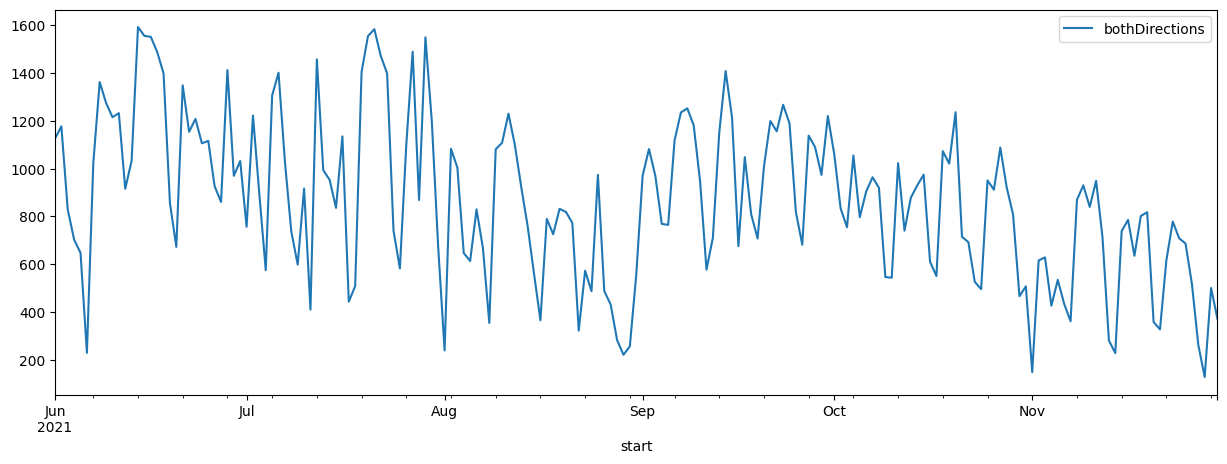

In [126]:
df.plot(figsize=(15,5));

# _2. Livraria do Python para previsão

A sugestão é que seja usada a livraria [StatsForecast](https://nixtla.github.io/statsforecast/), mas pode ser usada qualquer uma desde que recomendada em [Python implementations of time series forecasting and anomaly detection](https://robjhyndman.com/hyndsight/python_time_series.html) by Rob J Hyndman (2022-10-07).

In [127]:
%%capture
!pip install statsforecast

In [128]:
%%capture
!pip install datasetsforecast

In [129]:
from statsforecast import StatsForecast

In [130]:
from statsforecast.models import SeasonalNaive, AutoARIMA, AutoETS

In [131]:
from datasetsforecast.losses import rmse, mae, mape

In [132]:
from statsmodels.graphics.tsaplots import plot_acf

In [133]:
from statsmodels.graphics.tsaplots import plot_acf

# _3. Previsão para as duas semanas seguintes 

> **Tarefa 1:** Fazer a previsão para todos os catorze dias entre `2021-12-01` a `2021-12-14`, usando o melhor método, **escolhido com base nas melhores práticas**, entre:
* um elementar (escolher mesmo só um método elementar para testar), 
* um ETS (em versão de seleção automática) e
* um ARIMA (em versão de seleção automática).

In [134]:
Y_df = (df
        .reset_index()
        .rename(columns={'start': 'ds', 'bothDirections': 'y'})
        .assign(unique_id = 'Kreuther')
        .filter(['unique_id', 'ds', 'y'])
        )
Y_df

,unique_id,ds,y
0,Kreuther,2021-06-01,1125.0
1,Kreuther,2021-06-02,1177.0
2,Kreuther,2021-06-03,829.0
3,Kreuther,2021-06-04,703.0
4,Kreuther,2021-06-05,648.0
...,...,...,...
178,Kreuther,2021-11-26,518.0
179,Kreuther,2021-11-27,263.0
180,Kreuther,2021-11-28,129.0
181,Kreuther,2021-11-29,501.0


In [135]:
StatsForecast.plot(Y_df)

## **3.1. Previsão**

In [136]:
model_list =  [SeasonalNaive(season_length=7), 
               AutoARIMA(season_length=7),
               AutoETS(season_length=7)] #dados semanais
sf = StatsForecast(df=Y_df, models=model_list, freq='D')

In [137]:
#cálculo dos valores ajustados

forecast_df = sf.forecast(h=14, fitted=True)
forecast_df

,ds,SeasonalNaive,AutoARIMA,AutoETS
unique_id,,,,
Kreuther,2021-12-01,709.0,565.868225,496.426056
Kreuther,2021-12-02,687.0,584.646484,426.689850
Kreuther,2021-12-03,518.0,574.794067,405.858917
Kreuther,2021-12-04,263.0,295.742798,124.292259
Kreuther,2021-12-05,129.0,263.418671,-5.819431
Kreuther,2021-12-06,501.0,628.624695,462.106689
Kreuther,2021-12-07,372.0,681.100159,501.619446
Kreuther,2021-12-08,709.0,728.194885,496.426056
Kreuther,2021-12-09,687.0,723.134216,426.689850


In [138]:
sf.plot(Y_df, forecast_df)

In [139]:
#inspecionar os valores ajustados durante o treino
insample_df = sf.forecast_fitted_values()
insample_df

,ds,y,SeasonalNaive,AutoARIMA,AutoETS
unique_id,,,,,
Kreuther,2021-06-01,1125.0,NaN,1123.875000,1059.344971
Kreuther,2021-06-02,1177.0,NaN,1175.822998,1083.055420
Kreuther,2021-06-03,829.0,NaN,828.171021,1054.736816
Kreuther,2021-06-04,703.0,NaN,702.296997,934.473022
Kreuther,2021-06-05,648.0,NaN,647.351990,550.895874
...,...,...,...,...,...
Kreuther,2021-11-26,518.0,818.0,697.198608,653.748840
Kreuther,2021-11-27,263.0,359.0,314.117310,312.272949
Kreuther,2021-11-28,129.0,328.0,271.780029,160.429535


## **3.2. Avaliação da capacidade preditiva dos métodos**

In [140]:
# previsões a vários horizontes
crossvalidation_df = sf.cross_validation(
    df = Y_df,
    h = 7,
    step_size = 2, #step de 2 dias para não condicionar o modelo a um dia específico da semana
    n_windows = 1
  )
crossvalidation_df

,ds,cutoff,y,SeasonalNaive,AutoARIMA,AutoETS
unique_id,,,,,,
Kreuther,2021-11-24,2021-11-23,709.0,636.0,784.330322,754.363098
Kreuther,2021-11-25,2021-11-23,687.0,802.0,786.879395,681.220032
Kreuther,2021-11-26,2021-11-23,518.0,818.0,756.734131,663.659180
Kreuther,2021-11-27,2021-11-23,263.0,359.0,439.614410,379.965576
Kreuther,2021-11-28,2021-11-23,129.0,328.0,398.354858,248.387100
Kreuther,2021-11-29,2021-11-23,501.0,617.0,744.387390,717.742920
Kreuther,2021-11-30,2021-11-23,372.0,779.0,835.445251,763.124390


In [141]:
StatsForecast.plot(Y_df, crossvalidation_df)
#em uma análise mais próxima, percebemos que a linha vermelha (AutoETS) é a que aparenta estar mais próxima dos dados reais

In [142]:
#teste de rmse, mae, mape de todos os métodos
ts = crossvalidation_df.y
f1 = crossvalidation_df.SeasonalNaive
f2 = crossvalidation_df.AutoETS
f3 = crossvalidation_df.AutoARIMA

eval = pd.DataFrame({'rmse': [rmse(ts,f1), rmse(ts,f2), rmse(ts, f3)],
                     'mae': [mae(ts,f1), mae(ts,f2), mae(ts, f3)],
                     'mape': [mape(ts,f1), mape(ts,f2), mape(ts, f3)]})
eval
#pelo resultado obtido, conclui-se que o método AutoETS é o melhor para a presente
#previsão, pois apresenta os menores valores de erro pelos testes realizados 

,rmse,mae,mape
0,219.244156,186.571426,58.325493
1,189.434433,148.717453,45.826259
2,253.661224,223.820831,74.338484


### **3.4.2. Diagnóstico dos resíduos**





In [143]:
# cálculo dos resíduos
resid_df = (insample_df
            .assign(resid_snaive = insample_df.y - insample_df.SeasonalNaive)
            .assign(resid_ets = insample_df.y - insample_df.AutoETS)
            .assign(resid_arima = insample_df.y - insample_df.AutoARIMA))

resid_df

,ds,y,SeasonalNaive,AutoARIMA,AutoETS,resid_snaive,resid_ets,resid_arima
unique_id,,,,,,,,
Kreuther,2021-06-01,1125.0,NaN,1123.875000,1059.344971,NaN,65.655029,1.125000
Kreuther,2021-06-02,1177.0,NaN,1175.822998,1083.055420,NaN,93.944580,1.177002
Kreuther,2021-06-03,829.0,NaN,828.171021,1054.736816,NaN,-225.736816,0.828979
Kreuther,2021-06-04,703.0,NaN,702.296997,934.473022,NaN,-231.473022,0.703003
Kreuther,2021-06-05,648.0,NaN,647.351990,550.895874,NaN,97.104126,0.648010
...,...,...,...,...,...,...,...,...
Kreuther,2021-11-26,518.0,818.0,697.198608,653.748840,-300.0,-135.748840,-179.198608
Kreuther,2021-11-27,263.0,359.0,314.117310,312.272949,-96.0,-49.272949,-51.117310
Kreuther,2021-11-28,129.0,328.0,271.780029,160.429535,-199.0,-31.429535,-142.780029


In [144]:
# diagnóstico dos resíduos - cronograma dos resíduos
sf.plot(resid_df)
#o diagnóstico mostra que algumas médias se aproximam mais de 0 do que outras, especialmente a do método AutoETS
#assim, os demais métodos ainda podem ser melhorados, particularmente o método SNaive

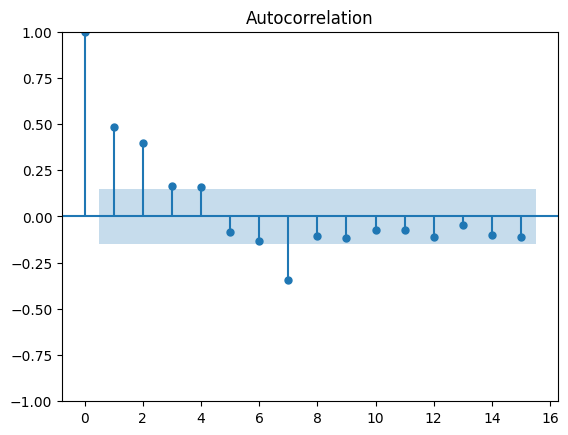

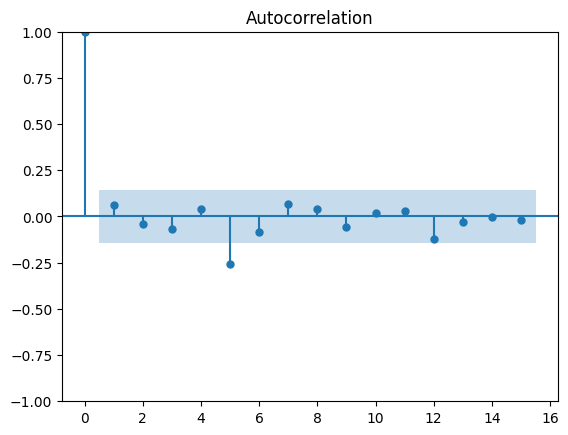

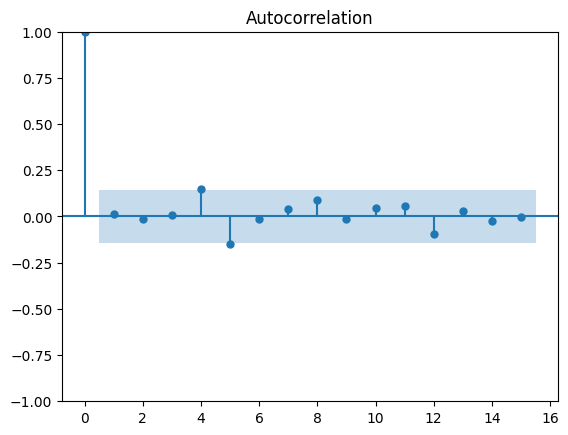

In [145]:
#diagnóstico dos resíduos - correlograma dos resíduos

plot_acf(resid_df.resid_snaive.dropna(), bartlett_confint=False, lags=15);
#nesta análise, a correlação de resíduos é mais evidente do que nas outras, o que confirma novamente que esse método necessita de melhoras
plot_acf(resid_df.resid_ets.dropna(), bartlett_confint=False, lags=15);
#não há correlação significativa nos resíduos
plot_acf(resid_df.resid_arima.dropna(), bartlett_confint=False, lags=15);
#assim como o método ETS, esse não demonstra correlação excessiva de resíduos

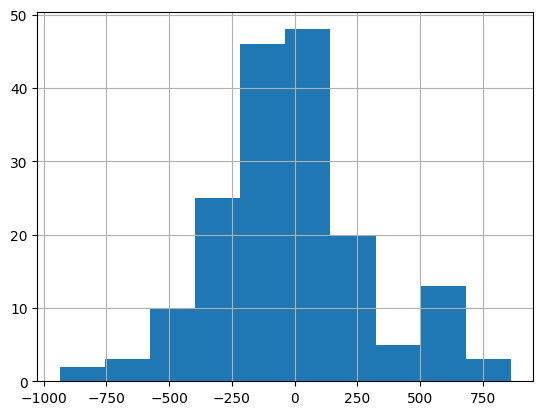

In [146]:
# diagnóstico dos resíduos - histograma dos resíduos
resid_df.resid_snaive.dropna().hist();

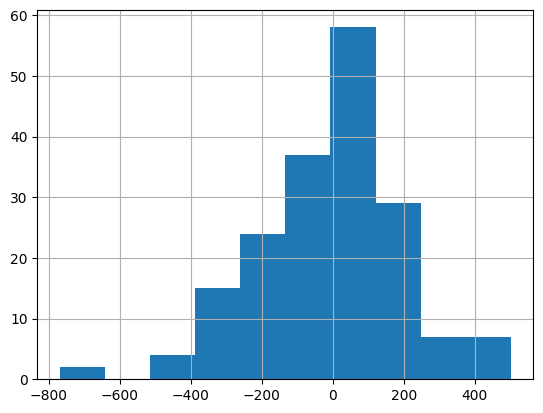

In [147]:
resid_df.resid_ets.dropna().hist();
#sugere que os resíduos não são normais

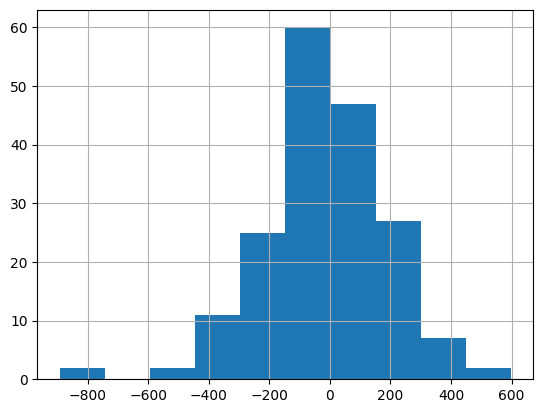

In [148]:
resid_df.resid_arima.dropna().hist();
#assim como o historigrama acima, sugere que os resíduos não são normais, o indica ser um bom método

# _4. Previsão para o dia seguinte

> **Tarefa 2:** Fazer a previsão apenas para o dia `2021-12-01`, usando o melhor método, **escolhido com base nas melhores práticas**, entre:
* um elementar (escolher mesmo só um método elementar para testar), 
* um ETS (em versão de seleção automática) e
* um ARIMA (em versão de seleção automática).

In [149]:
# Criamos o modelo de previsão, foi escolhido três metodos de privisão:

model_list2 = [SeasonalNaive(season_length=7),
              AutoARIMA(season_length=7),
              AutoETS(season_length=7),]

sf2 = StatsForecast(df=Y_df, models=model_list2, freq='D')

In [150]:
# Prevemos o valor para o dia 2021-12-01, usando três modelos

sf2.fit()
pro_d = sf2.predict(h=1)
pro_d

,ds,SeasonalNaive,AutoARIMA,AutoETS
unique_id,,,,
Kreuther,2021-12-01,709.0,565.868225,496.426056


In [151]:
#Fazer a validação, testando com valores passados

cv_df = sf2.cross_validation(
    df = Y_df,
    h = 1,
    step_size = 1,
    n_windows = 5
  )
cv_df

,ds,cutoff,y,SeasonalNaive,AutoARIMA,AutoETS
unique_id,,,,,,
Kreuther,2021-11-26,2021-11-25,518.0,818.0,698.589966,654.829956
Kreuther,2021-11-27,2021-11-26,263.0,359.0,314.528748,312.353729
Kreuther,2021-11-28,2021-11-27,129.0,328.0,273.343323,160.294083
Kreuther,2021-11-29,2021-11-28,501.0,617.0,588.325256,615.412781
Kreuther,2021-11-30,2021-11-29,372.0,779.0,669.350708,612.577393


In [152]:
StatsForecast.plot(Y_df, cv_df)

# Podemos verificar que a linha vermelha(AutoETS) parece estar mais aproximado dos dados originais

In [153]:
# Fazer o teste de rmse, mae, mape
ts = cv_df.y
f1 = cv_df.SeasonalNaive
f2 = cv_df.AutoARIMA
f3 = cv_df.AutoETS

eval = pd.DataFrame({'rmse': [rmse(ts,f1), rmse(ts,f2), rmse(ts, f3)],
                     'mae': [mae(ts,f1), mae(ts,f2), mae(ts, f3)],
                     'mape': [mape(ts,f1), mape(ts,f2), mape(ts, f3)]})
eval

,rmse,mae,mape
0,252.159470,223.600006,76.248562
1,174.439728,152.227600,52.742565
2,136.459015,114.493591,31.389585


Pelo resultado, podemos concluir que o melhor modelo é AutoETS, pois apresentam valores de erro mais reduzidos. 
Ou seja, o valor previsto para o dia 2021-12-01 é 496.426056.   